In [13]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from keras.callbacks import Callback
from keras.models import Sequential
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout, Lambda
from keras.utils import to_categorical
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.regularizers import l2
from keras.layers import UpSampling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras import regularizers


!pip install keras-lookahead
from keras_lookahead import Lookahead
from keras.datasets import cifar10

In [14]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

no_of_classes = len(np.unique(y_train))
print(no_of_classes)

#Data transformation 
#Normalising the pixels
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255


#Split the training and validation data
X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)

#Encoding the y_train, y_val and y_test
y_train=to_categorical(y_train,10)
y_val=to_categorical(y_val,10)
y_test=to_categorical(y_test,10)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
10
(35000, 32, 32, 3)
(35000, 1)
(15000, 32, 32, 3)


In [15]:
adam=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6, amsgrad=False)

#initialize lookahead
lk = Lookahead(adam, sync_period=5, slow_step=0.5, name = 'Lookahead')
#opt_rms = keras.optimizers.RMSprop(lr=0.0003,decay=1e-6)

model6 = Sequential()
model6.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model6.add(BatchNormalization())
model6.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=2))
model6.add(Dropout(0.2))

model6.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=2))
model6.add(Dropout(0.2))

model6.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=2))
model6.add(Dropout(0.2))

model6.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=2))
model6.add(Dropout(0.2))

model6.add(Flatten())
model6.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model6.add(BatchNormalization())
model6.add(Dropout(0.3))
model6.add(Dense(10, activation='softmax'))



model6.compile(optimizer = lk.optimizer, loss ='categorical_crossentropy',metrics=['accuracy'])

model6.summary()

#Data augmentation
datagen = ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False)

it_train = datagen.flow(X_train,y_train)
it_val = datagen.flow(X_val,y_val)
steps = int(X_train.shape[0] / 64)

history6=model6.fit_generator(it_train,
                              epochs=100,
                              steps_per_epoch=steps,
                              validation_data=(it_val),
                              validation_steps = 100)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_11 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)       

In [16]:
#Model evaluation 
test_acc = model6.evaluate(x_test,y_test)
print('Test accuracy of the novel model is: ', test_acc[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.4339 - accuracy: 0.8607
Test accuracy of the novel model is:  0.8607000112533569


In [ ]:
'''
Summary of the overall model: 

The objective is to develop a model architecture for cifar10 and implementing it to achieve the highest test accuracy for cifar10 dataset.

Similar to Resnet I have used one convolutional2D layer followed by batchnormalisation, at 6 instances in the model. In the original resnet maxpooling2D layer occurs after 
the batchnormalisation. In the novel model I have tried using maxpooling layer with a pool size of 2, after bacthnormalising layer in the 2nd convolutional layer of a block. 
Maxpooling2D layer is more accurate than the averagepooling layer

A traditional convolutional neural network for image classification, will use pooling layers to downsample input images. 
For example, an average pooling or max pooling layer will reduce the feature maps from a convolutional by half on each dimension, 
resulting in an output that is one quarter the area of the input.

Convolutional layers themselves also perform a form of downsampling by applying each filter across the input images or feature maps,
the resulting activations are an output feature map that is smaller because of the border effects. Often padding is used to counter 
this effect.


Also, I have used lookahead optimiser as Adam inner optimiser. Lookahead improves the learning stability and lowers the variance of its inner optimizer Adam,
Lookahead however maintains two sets of weights and then interpolates between them which in effect it allows a faster set of weights to ‘look ahead’ or explore
while the slower weights stay behind to provide longer term stability.The result is reduced variance during training, and much less sensitivity to sub-optimal 
hyper-parameters and reduces the need for extensive hyper-parameter tuning. This is done while achieving faster convergence. 


Model architecture:
The input layer is a convolutional2D layer and the output layer is a fully connected dense layer with 10 nodes and softmax activation. 


Convolutional layers: 8
Maxepooling layers: 4
Dropout layers: 4
Batchnormalisation layer: 9
Fully connected dense layer with relu activation: 2 


Let us explore the layers in detail:

Input: Image of dimensions (32,32, 3).
Convolution Layer Conv1: The filter size of 32
Conv1-1: 32 filters
Conv1-2: 32 filters and Maxpooling
Image dimensions: (16,16)


Convolution layer Conv2: Double the filter size to 64
Input Image dimensions: (16,16)
Conv2-1: 64 filters
Conv2-2: 64 filters and Maxpooling

upsampling layer : 


Convolution Layer Conv3: Double the filter size to 128
Input Image dimensions: (8,8)
Conv3-1: 128 filters
Conv3-2: 128 filters and Maxpooling


Convolution Layer Conv3: Double the filter size to 256
Input Image dimensions: (4,4)
Conv3-1: 256 filters
Conv3-2: 256 filters and Maxpooling


Flatten layer creates a feature vector of (1,1024)

The output dimensions here are (2,2). At this point, we flatten the output of this layer to generate a feature vector
Fully Connected/Dense: 128 nodes, generating a feature vector of size(1, 128)
Fully Connected /Dense: 10 nodes (Output layer), generating 10 channels for 10 classes. This is then passed on to a Softmax activation function


Benefits of the model: 
The model uses batchnormalising layer followed by convolutional2D layer, as it has severl advantages such as reducing internal covariant shift, reducing the dependence of gradients on the scale of the parameters or their initial values.
Regularizes the model and reduces the need for dropout, photometric distortions, local response normalization and other regularization techniques.

I have avoided the use of strides in the convolutional2D layers as it can cause loss of information. 
If a pattern is visible most strongly on a position that is skipped, that information is lossed.
To avoid this, usually max pooling layers are used to shrink the size of activation maps. 

Usage of upsampling2D layer followed by the convolutional 2D layer significantly improves the model test accuracy. And in some instanced it is regarded that it is 
similar to the Conv2DTranspose. 

The model is optimised by the usage of Lookahead optimiser and adam as the inner optimiser. Data augmentation is used in training data. 

'''

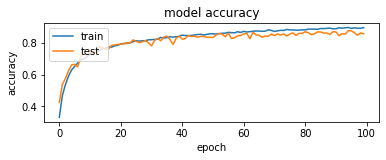

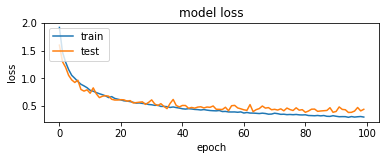

In [17]:
 # summarize history for loss  and accuracy


plt.subplot(212)  
plt.plot(history6.history['accuracy'])  
plt.plot(history6.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()
  
plt.subplot(212)  
plt.plot(history6.history['loss'])  
plt.plot(history6.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show() 